# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [37]:
# Load pickled data
import pickle
import numpy as np

# TODO: fill this in based on where you saved the training and testing data
training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
train_sizes, train_coords = train['sizes'], train['coords']
test_sizes, test_coords = test['sizes'], test['coords']

In [38]:
print (X_train.shape,y_train.shape,X_test.shape, y_test.shape)
#print (X_train[8000])
print (np.unique(np.array(y_train)).size)

(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)
43


In [39]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:4]

# TODO: how many classes are in the dataset
n_classes = np.unique(np.array(y_train)).size #What is this?

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Data exploration visualization goes here.

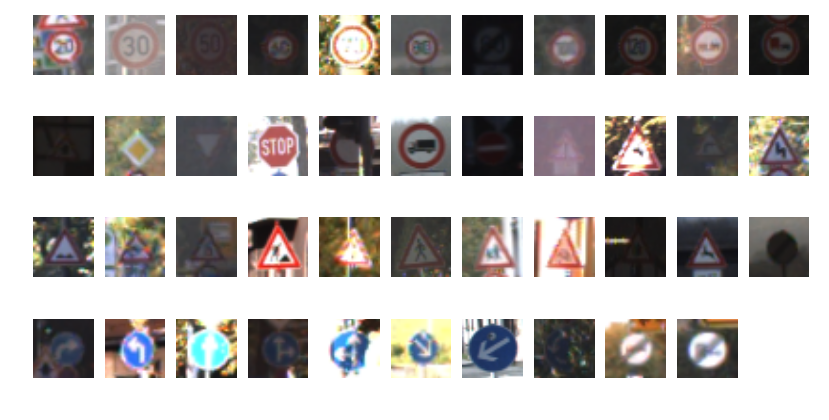

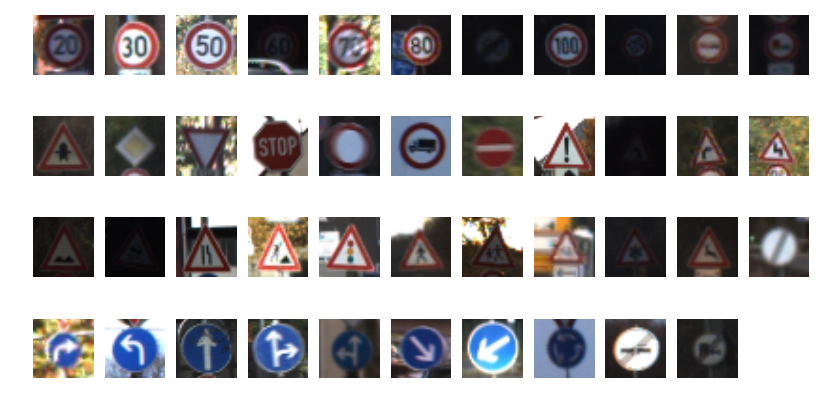

In [40]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

def get_images(images, labels):
    selected = []
    for i in range(43):
        y=np.where(labels==i)[0][0]
        selected.append(images[y])
    
    return selected

def draw_images(fig,images):
    #Draw images
    num_rows = 4
    num_cols = 11
    fig = plt.figure(fig,figsize=(10,5),dpi=32)
    gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2,hspace=0.2)

    ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

    for i,im in enumerate(images):
        ax[i].imshow(im)
        ax[i].axis('off')

    temp = ax[i+1].axis('off') #44th image off   
    
images = get_images(X_train, y_train)
draw_images(1,images)
images = get_images(X_test, y_test)
draw_images(2,images)


In [56]:
# Display how many records for each class of image
#np.bincount(y_train),np.bincount(y_test)
print(X_test.shape)

(12630, 32, 32, 3)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Implementation 1
Try tflearn,no preprocessing of image. Just simple CNN to get hands dirty

In [ ]:
# Building convolutional network

import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

tflearn.config.init_graph()
# architecture: 3x32x32-100C7-MP2-150C4-150MP2-250C4-250MP2-300N-43N)

network = input_data(shape=[None, 32, 32, 3], name='input')
#network = conv_2d(network, 100, 7, activation='relu', regularizer="L2")
#network = max_pool_2d(network, 2)
#network = local_response_normalization(network)
#network = conv_2d(network, 150, 4, activation='relu', regularizer="L2")
#network = max_pool_2d(network, 2)
#network = local_response_normalization(network)
#network = conv_2d(network, 250, 4, activation='relu', regularizer="L2")
#network = max_pool_2d(network, 2)
#network = local_response_normalization(network)
network = fully_connected(network, 300, activation='tanh')
#network = dropout(network, 0.8)
network = fully_connected(network, 43, activation='softmax')
network = regression(network, optimizer='adam', learning_rate=0.01,
                     loss='categorical_crossentropy', name='target')
print ("Network is ready")

### Implementation 2
Inspired by tflearn example convnet_cifar10

In [31]:
import tensorflow as tf
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

# architecture: 3x32x32-32C3-MP2-64C3-64C3-MP2-512N-43N

# to support new models not being contaminated by old use with
g = tf.Graph()
with g.as_default():
    #network = input_data(shape=[None, 32, 32, 3])
    network = input_data(shape=[None, 32, 32, 3], data_preprocessing=img_prep)
    #network = input_data(shape=[None, 32, 32, 3], data_augmentation=img_aug)
    network = conv_2d(network, 32, 3, activation='relu', regularizer="L2")
    network = max_pool_2d(network, 2)
    network = conv_2d(network, 64, 3, activation='relu', regularizer="L2")
    network = conv_2d(network, 64, 3, activation='relu', regularizer="L2")
    network = max_pool_2d(network, 2)
    network = fully_connected(network, 512, activation='relu')
    network = dropout(network, 0.5)
    network = fully_connected(network, 43, activation='softmax')
    network = regression(network, optimizer='adam', learning_rate=0.0001,
                            loss='categorical_crossentropy', name='target')
    
    model = tflearn.DNN(network, tensorboard_verbose=0,checkpoint_path='traffic-sign.ckpt')
print ("Network ready")

Network ready


## Training
TFLearn provides a model wrapper 'DNN' that can automatically performs a neural network classifier tasks, such as training, prediction, save/restore, etc... We will run it for 10 epochs (the network will see all data 10 times) with a batch size of 128.

With no preprocessing batch size=128, validation_set=0.1,n_epoch=10 for model convnet_cifar10_v1_nopreprocessing we got the following:
<P>Adam | epoch: 010 | loss: 0.24385 - acc: 0.9801 | val_loss: 0.04012 - val_acc: 0.9906 -- iter: 35288/35288
<B>But this model's accuracy on test data was 0.94988123500337696</B>
<P>
Preprocessing model - trafficsign_preprocessV1

Adam | epoch: 010 | loss: 0.00000 - acc: 0.0000 | val_loss: 0.04668 - val_acc: 0.9893 -- iter: 35288/35288
<B>accuracy with preprocessing 0.94576405372680039</B>

Image augmentation

| Adam | epoch: 010 | loss: 0.00000 - acc: 0.0000 | val_loss: 0.04540 - val_acc: 0.9906 -- iter: 35288/35288

Accuracy =0.95312747415435384
<P>
No preprocessing, or image augmentation. just learning rate = 0.002

| Adam | epoch: 010 | loss: 0.32599 - acc: 0.9436 | val_loss: 0.12291 - val_acc: 0.9697 -- iter: 35288/35288

1178 mismatches
<P>
No preprocessing, learning rate .001, two drop-out of 0.7 before and after 512 node fully connected node

| Adam | epoch: 010 | loss: 0.20758 - acc: 0.9745 | val_loss: 0.04793 - val_acc: 0.9906 -- iter: 35288/35288

702 mismatches

No preprocessing, one drop-out of 0.5, learning rate .0001, batch64, epoch30

| Adam | epoch: 030 | loss: 1.03877 - acc: 0.9505 | val_loss: 0.01472 - val_acc: 0.9969 -- iter: 35288/35288

accuracy = 0.9582739507217588
mismatches =  527

** Model using transfer learning **

Test accuracy is =  [0.96310372114747833]

mismatches =  466

[ 1  8 23 22 32 14 21 47 19 24  3  0  7  5  1  1  1  1 43  0  0 15  3  9  9
 30 22 31  4  1 25  5  0  1  2  0  3  5 11  3  4 10]



In [32]:
# Training
trainY = to_categorical(y_train,43)
X_prep = np.array(X_train, dtype=float)

with g.as_default():
    model.fit(X_prep, trainY, n_epoch=30, shuffle=True, validation_set=0.10, batch_size=64,
                snapshot_step=100,show_metric=True,run_id='trafficsign_lr0001-batch64-epoch30')

    model.save("traffic-sign.tfl")
print ("model trained")


Training Step: 16560  | total loss: 1.03877
| Adam | epoch: 030 | loss: 1.03877 - acc: 0.9505 | val_loss: 0.01472 - val_acc: 0.9969 -- iter: 35288/35288
Training Step: 16560  | total loss: 1.03877
| Adam | epoch: 030 | loss: 1.03877 - acc: 0.9505 | val_loss: 0.01472 - val_acc: 0.9969 -- iter: 35288/35288
--


In [ ]:
#save model and try it on test data
#model.save("trafficsign_imageaugV1")

## Test Model 

In [ ]:
#load mode weights saved earlier. You have to define the network and model to load the weights.

#modelread = tflearn.DNN(network)
#modelread.load("trafficsign_imageaugV1")


In [61]:
testY = to_categorical(y_test,43)
with g.as_default():
    val = model.evaluate(X_test,testY)
    print(val)

[0.9582739507217588]


In [62]:
with g.as_default():
    results=model.predict(X_test)

In [63]:
#compare predicted results and print images that are not correct

y_out = np.array(results).argmax(1) #argmax converts to_categorical
incorrects = []
y_errors = []
for i,test in enumerate(y_test):
    if(y_out[i] != test):
        #print (i, test, y_out[i])
        incorrects.append([i, test, y_out[i]])
        y_errors.append(test)
        
print("mismatches = ", len(incorrects))

# Display how many errors for each class of image
np.bincount(np.array(y_errors))

mismatches =  527


array([ 4,  7, 19, 11, 36, 22, 28, 46, 15, 12, 10, 17,  6,  4,  0,  0,  2,
        4, 50,  0,  2, 15,  2, 17, 17, 35, 22, 30,  7,  0, 23,  3,  0,  0,
        1, 11,  2,  1, 31,  3, 10,  2])

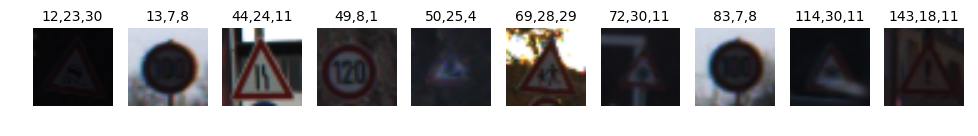

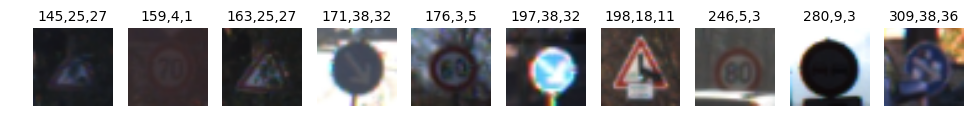

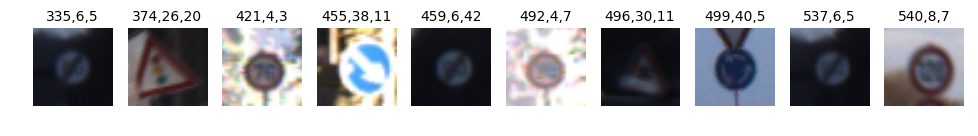

In [36]:
#draw some incorrect results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

def draw_mismatches(fig,selected):
    #Draw images
    num_rows = 1
    num_cols = 10
    fig = plt.figure(fig,figsize=(12,12),dpi=32)
    gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2,hspace=0.2)

    ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

    cnt=0
    for [i,expected,predicted] in selected:
        #print (i,expected,predicted)
        im = X_test[i]
        ax[cnt].imshow(im)
        ax[cnt].axis('off')
        ax[cnt].set_title(str(i) +',' + str(expected) + ',' + str(predicted),fontsize=10 )
        cnt += 1
        
draw_mismatches(1,incorrects[0:10])
draw_mismatches(2,incorrects[10:20])
draw_mismatches(3,incorrects[20:30])

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
I scaled input data with the mean of training set and standard dev of the training set.
Though I didn't see huge improvement in accuracy of my models. But I guess it is a good thing to do.

I chose these as they seem to be pretty standard tricks. I suppose this hel

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I seperated the training data into 90% training and 10% validation data. I didn't touch test data. Used it only for final testing. I tried image augmentation by flipping the image, creating a blur image and by rotating the images a bit but none of these improved the test accuracy beyond 95%.

I also used a totally different data set on birds (Caltech-UCSD Birds-200–2011 data set and Cifar 10 dataset of 74K images) and trained the DNN on this set first. Then I used transfer learning and trained this model on traffic signs. 

This combined approach gave me an accuracy of 96.3%

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
 architecture: 3x32x32-32C3-MP2-64C3-64C3-MP2-512N-43N

I created a 7 layer deep neural network after the input layer.

The first layer is a 32x3 convolution layer  (32 filters of size 3x3, stride of 1 and padding to keep output same as input). After the convolution there is a Relu activation and L2 regularization

Second layer is a max pooling layer with a kernel size of 2

Third and Fourth layers are 64x3 convolution layers (64 filters of size 3x3, stride of 1 and padding to keep output same as input). After the convolutions there is a Relu activation and L2 regularization

Fifth layer is a max pooling layer with a kernel size of 2

Sixth layer is a fully connected layer with 512 units and relu activation applied to this layer

There is a 50% drop out after layer 6. 

Final layer is a fully conected layer with 43 units with softmax activation. This matching the 43 classes we need to classify data on.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

My regression layer uses ADAM Optimizer. I tried learning rate of .001, .002 but later settled for .0001 as that gave best results. my loss function was categorical_crossentropy (aka multiclass logloss).

I tried batch sized of 128, 96 and 64. 64 worked best.

I tried epoch of 10 then increased it to 30 with data shuffled between each epoch

For my transfer learning run my first model used the same paramaters.


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I decided to look at other CNN models on images instead of reinventing a new one from scratch.
After looking at a few papers and implementations I stumbled upon a tflearn library by MIT which made trying models very easy. I wanted to get more data for my model and that lead to idea of transfer learning.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

I have selected 6 images from the web. The images were cropped from pictures on the road. The third image apprears to be a mirror image of the sign that we trained on. Not sure if that is the case or the sign exists in both forms. I don't see a any major difference why the probability of these images should be below the test probability except a small sample size.

(6, 32, 32, 3)


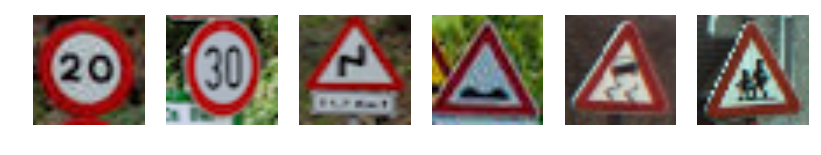

In [162]:
### Load the images and plot them here.
from scipy import misc

### Feel free to use as many code cells as needed.
myimages_dir = "./data/"
myfiles = [0,1,21,22,23,28]
images = []
num_rows = 1
num_cols = len(myfiles)
fig = plt.figure(1,figsize=(10,5),dpi=32)
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2,hspace=0.2)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

for i,file in enumerate(myfiles):
    im = misc.imread(myimages_dir + str(file) + '.jpg')
    images.append(im)
    ax[i].imshow(im)
    ax[i].axis('off')

images = np.array(images)
print (images.shape)

In [113]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with g.as_default():
    results=model.predict(images)
    
#compare predicted results and print images 
y_out = np.array(results).argmax(1) #argmax converts to_categorical
incorrects = []
y_errors = []
for i,expected in enumerate(myfiles):
    accuracy = int(results[i][y_out[i]]*100)
    if(y_out[i] != expected):
        print ('Incorrect: For image', i+1, 'expected', expected, 'predicted', y_out[i], 'with',str(accuracy) +'% accuracy')
    else:
        print ("Correctly predicted image", i+1, 'as', expected,'with',str(accuracy) +'% accuracy')


Incorrect: For image 1 expected 0 predicted 9 with 80% accuracy
Correctly predicted image 2 as 1 with 99% accuracy
Incorrect: For image 3 expected 21 predicted 26 with 95% accuracy
Correctly predicted image 4 as 22 with 100% accuracy
Incorrect: For image 5 expected 23 predicted 24 with 57% accuracy
Correctly predicted image 6 as 28 with 79% accuracy


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

No. I am getting only 50% accuracy which is pretty bad! My test data accuracy was 96%

In [142]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

correct = tf.nn.in_top_k(results, myfiles, 5)
total_correct = tf.reduce_sum(tf.cast(correct, tf.int32))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)
print (sess.run(correct))
print(sess.run(total_correct))
print(sess.run(accuracy))


[False  True False  True  True  True]
4
0.666667


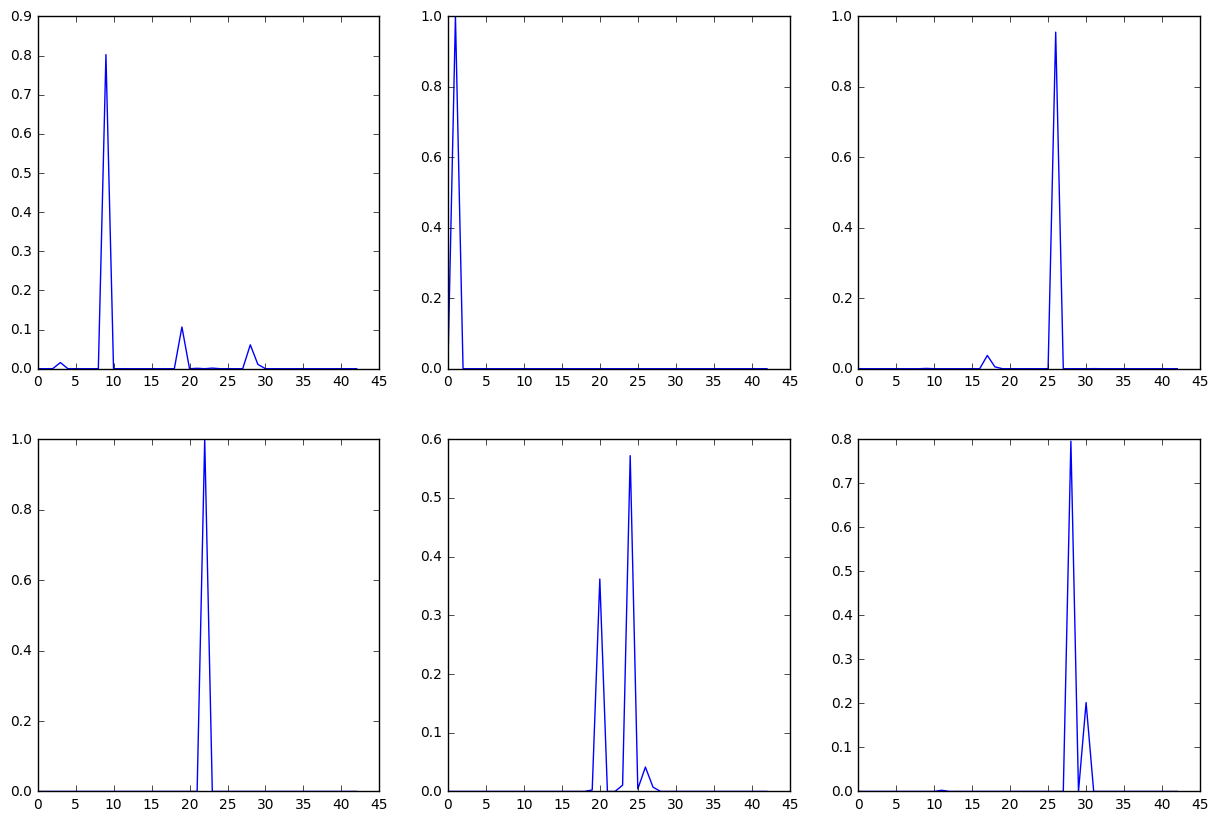

In [161]:
#visualize softmax probabilities
num_rows = 2
num_cols = int(len(myfiles)/2)
fig = plt.figure(1,figsize=(15,10),dpi=32)
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2,hspace=0.2)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

for i,file in enumerate(myfiles):
    ax[i].plot(results[i])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

First, third and fift images are predicted incorrectly.

For the first image the correct answer (0) is not even in top 5. 

For third image the correct answer (21) is also not showing up with any probabilities as shown in the graph above.

For fifth image the distribution shows two high probabilities but both are incorrect.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.